In [1]:
import pandas as pd

#### In the first step, we cleaned and tokenized dataset.

In [2]:
# Load the dataset
data = pd.read_csv (r'C:\Users\Muham\OneDrive\Desktop\CA 2 FILE\data.csv')

# Check for missing values
missing_values = data.isnull().sum()

if missing_values.any():
    print("Missing values detected. Handling missing values...")

    # Replace missing values with the mean
    data.fillna(data.mean(), inplace=True)

    print("Missing values handled.")
else:
    print("No missing values found.")

# Save the preprocessed data to a new CSV file
preprocessed_file_path = (r'C:\Users\Muham\OneDrive\Desktop\CA 2 FILE\preprocessed_data.csv')
data.to_csv(preprocessed_file_path, index=False)

print("Preprocessed data saved to:", preprocessed_file_path)

No missing values found.
Preprocessed data saved to: C:\Users\Muham\OneDrive\Desktop\CA 2 FILE\preprocessed_data.csv


#### The following code represents the data visualization to analyze the natire of data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  36733 non-null  int64  
 1   AT          36733 non-null  float64
 2   AP          36733 non-null  float64
 3   AH          36733 non-null  float64
 4   AFDP        36733 non-null  float64
 5   GTEP        36733 non-null  float64
 6   TIT         36733 non-null  float64
 7   TAT         36733 non-null  float64
 8   TEY         36733 non-null  float64
 9   CDP         36733 non-null  float64
 10  CO          36733 non-null  float64
 11  NOX         36733 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.4 MB


In [4]:
data.head(10)

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
5,6,3.8858,1017.7,83.946,3.5824,23.903,1086.0,549.98,134.67,11.868,0.23473,81.748
6,7,3.6697,1018.0,84.114,3.5804,23.889,1085.9,550.04,134.68,11.877,0.44412,84.592
7,8,3.5892,1018.2,83.867,3.5777,23.876,1086.0,549.88,134.66,11.893,0.79996,84.193
8,9,3.7108,1018.5,84.948,3.6027,23.957,1086.3,549.98,134.65,11.870,0.68996,83.978
9,10,4.8281,1018.5,85.346,3.5158,23.422,1083.1,549.80,132.67,11.694,1.02810,82.654


In [5]:
import matplotlib.pyplot as plt 

In [6]:
# Load the preprocessed dataset
data = pd.read_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 2 FILE\preprocessed_data.csv')

# Select sensor variables for visualization
sensor_variables = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

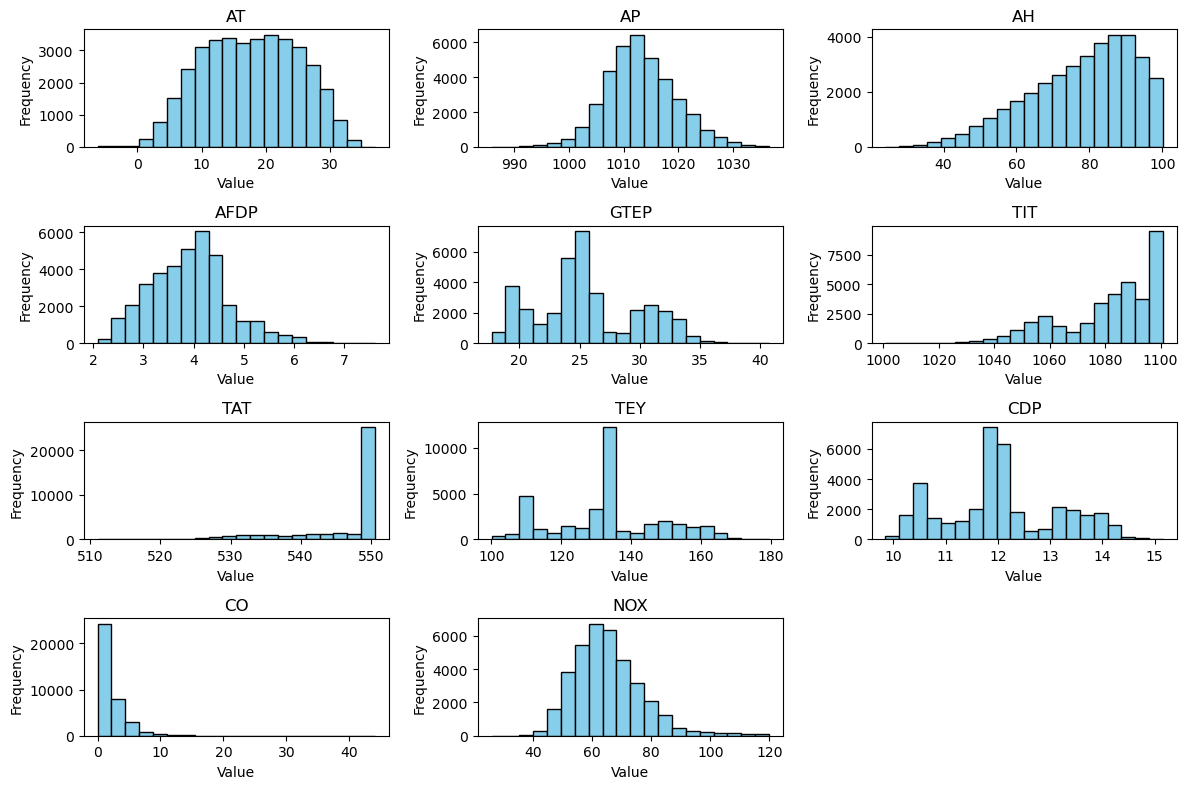

In [7]:
# Plot histograms for each sensor variable

plt.figure(figsize=(12, 8))
for i, var in enumerate(sensor_variables, start=1):
    plt.subplot(4, 3, i)
    plt.hist(data[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(var)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()


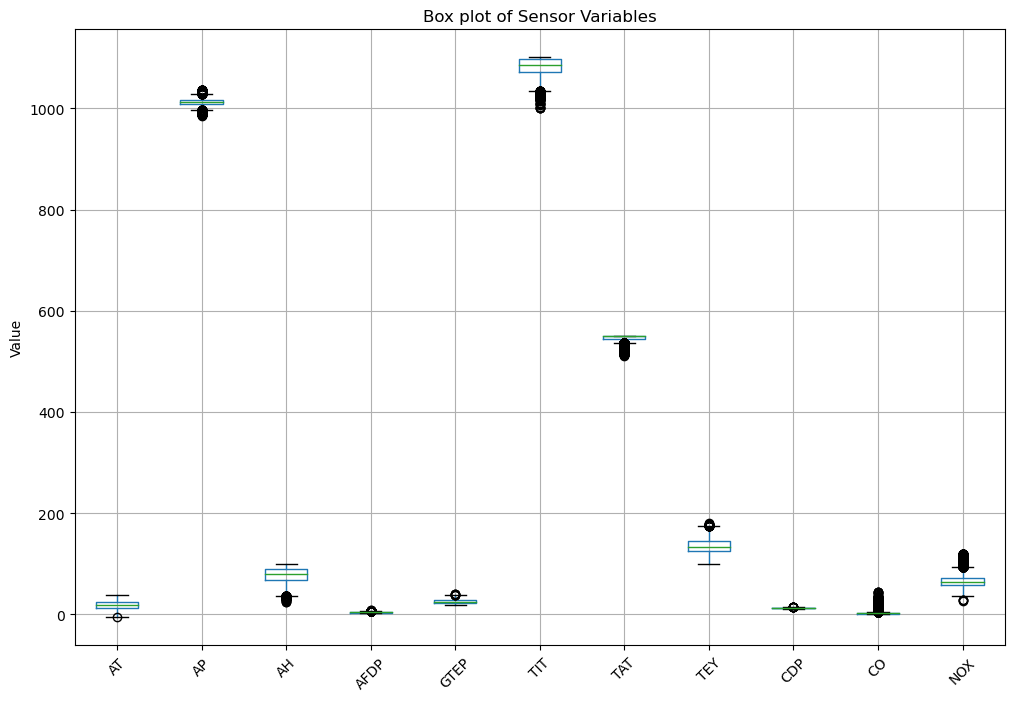

In [8]:
# Plot box plots for each sensor variable
plt.figure(figsize=(12, 8))
data[sensor_variables].boxplot()
plt.title('Box plot of Sensor Variables')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Calculate summary statistics
summary_statistics = data[sensor_variables].describe()
print(summary_statistics)

                 AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634    

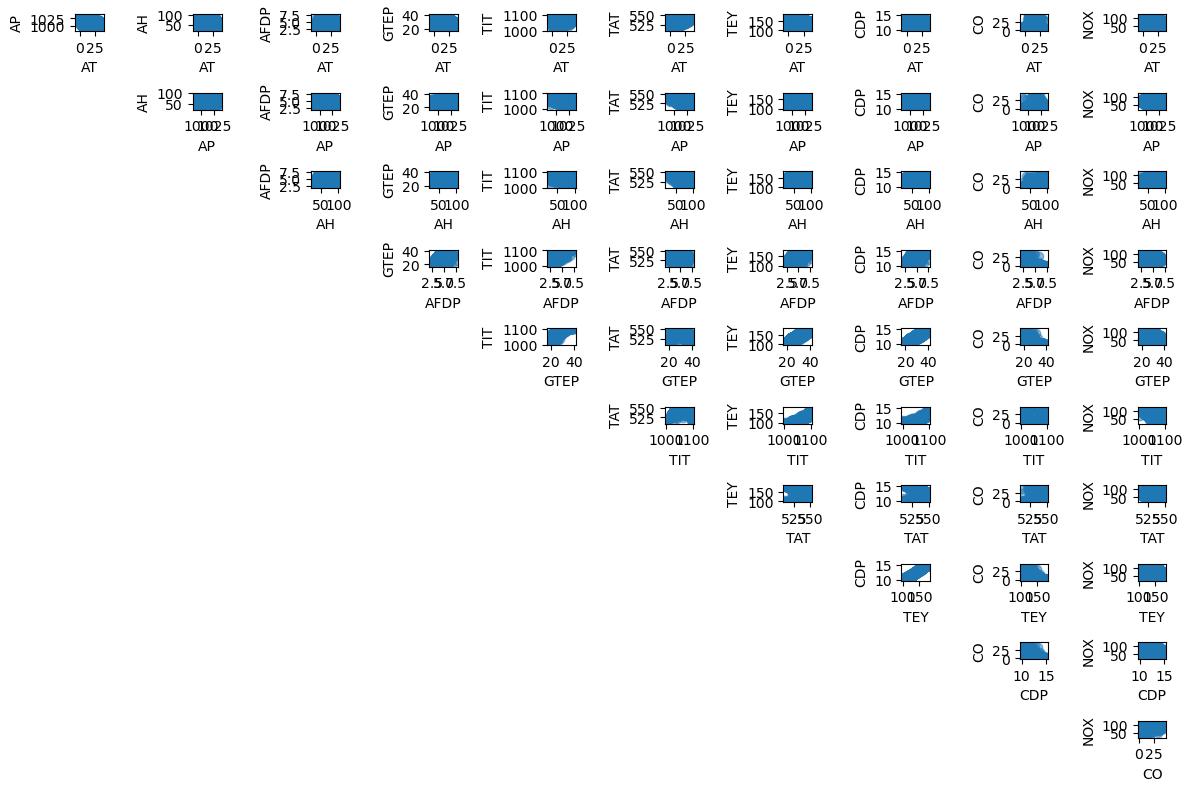

In [10]:
# Plot scatter plots for pairs of sensor variables
plt.figure(figsize=(12, 8))
for i in range(len(sensor_variables)):
    for j in range(i + 1, len(sensor_variables)):
        plt.subplot(len(sensor_variables) - 1, len(sensor_variables) - 1, (i * (len(sensor_variables) - 1)) + j)
        plt.scatter(data[sensor_variables[i]], data[sensor_variables[j]], alpha=0.5)
        plt.xlabel(sensor_variables[i])
        plt.ylabel(sensor_variables[j])

plt.tight_layout()
plt.show()

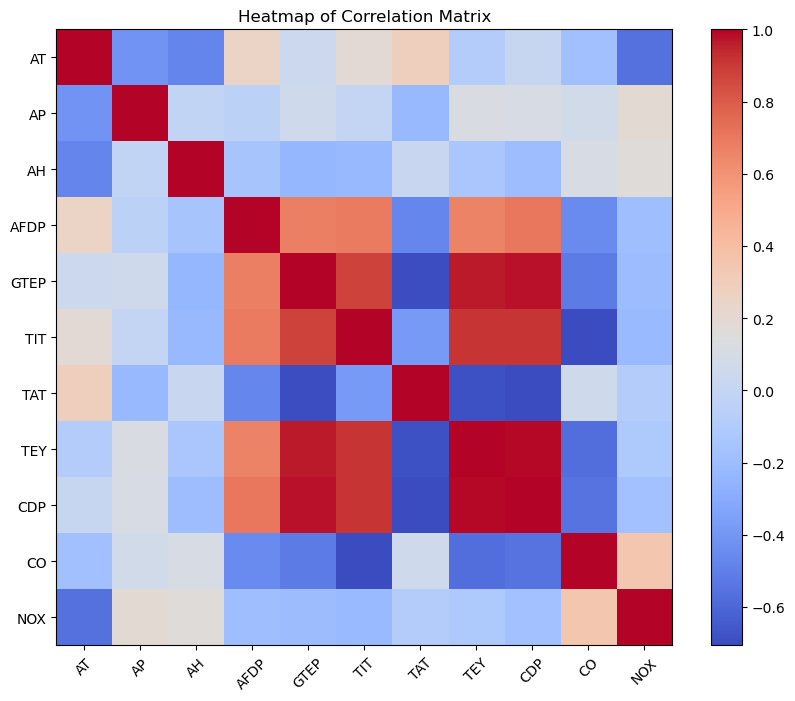

In [11]:
# Plot heatmap of correlation matrix
correlation_matrix = data[sensor_variables].corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of Correlation Matrix')
plt.xticks(range(len(sensor_variables)), sensor_variables, rotation=45)
plt.yticks(range(len(sensor_variables)), sensor_variables)
plt.show()

#### The following step creates the training using selected model.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
# Load the preprocessed dataset
data = pd.read_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 2 FILE\preprocessed_data.csv')

In [14]:
# Define input and target variables
X = data[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']].values
y = data['CO'].values  # 'Target_Variable'

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Reshape input data for LSTM model (assuming a sequence length of 1)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [15]:
# Define the LSTM model architecture
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 12451 (48.64 KB)
Trainable params: 12451 (48.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Define callbacks to save the model
checkpoint_filepath = "C:/Users/muham/OneDrive/Desktop/lstm_model_checkpoint.h5"
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback])

# Save the entire model to a file
saved_model_path = "C:/Users/Muham/OneDrive/Desktop/my_model.keras"
model.save(saved_model_path)

print("Model saved to:", saved_model_path)

Epoch 1/100
735/735 [==============================] - 9s 7ms/step - loss: 5.5872 - mae: 1.4267 - val_loss: 4.6781 - val_mae: 1.4162
Epoch 2/100
735/735 [==============================] - 3s 4ms/step - loss: 5.1333 - mae: 1.4262 - val_loss: 4.6753 - val_mae: 1.4018
Epoch 3/100
735/735 [==============================] - 4s 5ms/step - loss: 5.1336 - mae: 1.4250 - val_loss: 4.6792 - val_mae: 1.4197
Epoch 4/100
735/735 [==============================] - 4s 6ms/step - loss: 5.1333 - mae: 1.4267 - val_loss: 4.6760 - val_mae: 1.3812
Epoch 5/100
735/735 [==============================] - 4s 5ms/step - loss: 5.1339 - mae: 1.4235 - val_loss: 4.6768 - val_mae: 1.4109
Epoch 6/100
735/735 [==============================] - 3s 4ms/step - loss: 5.1333 - mae: 1.4263 - val_loss: 4.6753 - val_mae: 1.4015
Epoch 7/100
735/735 [==============================] - 4s 5ms/step - loss: 5.1320 - mae: 1.4237 - val_loss: 4.6829 - val_mae: 1.4295
Epoch 8/100
735/735 [==============================] - 5s 6ms/step - 

#### The next step is about the optimization of trained model.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:
# Load the preprocessed dataset
data = pd.read_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 2 FILE\preprocessed_data.csv')

In [19]:
# Define input and target variables
X = data[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']].values
y = data['CO'].values  #Target variable

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [20]:
# Reshape input data for LSTM model (assuming a sequence length of 1)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model architecture with dropout regularization
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(1)
])

In [21]:
# Compile the model with Adam optimizer and customized learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Define callbacks for model checkpointing and early stopping
checkpoint_filepath = "C:/Users/muham/OneDrive/Desktop/lstm_model_checkpoint.h5"
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback, early_stopping_callback])

# Save the entire model to a file
saved_model_path = "C:/Users/Muham/OneDrive/Desktop/my_model.keras"
model.save(saved_model_path)

print("Model saved to:", saved_model_path)

Epoch 1/100
735/735 [==============================] - 9s 5ms/step - loss: 5.5422 - mae: 1.3896 - val_loss: 3.9813 - val_mae: 1.2318
Epoch 2/100
735/735 [==============================] - 4s 6ms/step - loss: 4.3481 - mae: 1.2297 - val_loss: 3.5064 - val_mae: 1.1124
Epoch 3/100
735/735 [==============================] - 5s 6ms/step - loss: 3.9246 - mae: 1.1200 - val_loss: 3.1496 - val_mae: 1.0235
Epoch 4/100
735/735 [==============================] - 4s 6ms/step - loss: 3.6022 - mae: 1.0511 - val_loss: 2.8786 - val_mae: 0.9660
Epoch 5/100
735/735 [==============================] - 3s 5ms/step - loss: 3.4043 - mae: 0.9870 - val_loss: 2.6291 - val_mae: 0.8714
Epoch 6/100
735/735 [==============================] - 4s 5ms/step - loss: 3.1871 - mae: 0.9322 - val_loss: 2.4128 - val_mae: 0.8137
Epoch 7/100
735/735 [==============================] - 4s 6ms/step - loss: 2.9747 - mae: 0.8871 - val_loss: 2.3414 - val_mae: 0.8547
Epoch 8/100
735/735 [==============================] - 4s 5ms/step - 

735/735 [==============================] - 4s 5ms/step - loss: 2.1509 - mae: 0.7610 - val_loss: 1.1566 - val_mae: 0.6670
Epoch 63/100
735/735 [==============================] - 5s 6ms/step - loss: 2.0583 - mae: 0.7665 - val_loss: 1.1435 - val_mae: 0.6689
Epoch 64/100
735/735 [==============================] - 4s 5ms/step - loss: 2.2505 - mae: 0.8023 - val_loss: 1.3150 - val_mae: 0.7997
Epoch 65/100
735/735 [==============================] - 3s 4ms/step - loss: 2.1905 - mae: 0.7883 - val_loss: 1.0509 - val_mae: 0.6158
Epoch 66/100
735/735 [==============================] - 4s 5ms/step - loss: 2.1766 - mae: 0.7983 - val_loss: 1.3116 - val_mae: 0.7494
Epoch 67/100
735/735 [==============================] - 4s 6ms/step - loss: 2.1484 - mae: 0.7729 - val_loss: 0.9415 - val_mae: 0.5380
Epoch 68/100
735/735 [==============================] - 4s 6ms/step - loss: 2.2090 - mae: 0.8095 - val_loss: 1.1764 - val_mae: 0.6988
Epoch 69/100
735/735 [==============================] - 3s 4ms/step - loss: